<h2>Task 1. Data Selection and Distribution.</h2>
1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?
2. What is the proportion of individuals who purchased organic products?
3. Did you have to fix any data quality problems? Detail them.
4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read the organics dataset
df = pd.read_csv('organics.csv')

# show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 18 columns):
CUSTID          22223 non-null int64
GENDER          19711 non-null object
DOB             22223 non-null object
EDATE           22223 non-null object
AGE             20715 non-null float64
AGEGRP1         20715 non-null object
AGEGRP2         20715 non-null object
TV_REG          21758 non-null object
NGROUP          21549 non-null object
NEIGHBORHOOD    21549 non-null float64
LCDATE          21942 non-null object
ORGANICS        22223 non-null int64
BILL            22223 non-null float64
REGION          21758 non-null object
CLASS           22223 non-null object
ORGYN           22223 non-null int64
AFFL            21138 non-null float64
LTIME           21942 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 3.1+ MB
None


In [81]:
def data_exploration():
    X = df.drop(['CUSTID'], axis=1)
    feature_names = X.columns
    
    for i in range(len(feature_names)):
        print('Attribute: ' + feature_names[i])
        print(df[feature_names[i]].describe())
        print()
        print('Unique values:')
        print(df[feature_names[i]].unique())
        print('-----------------------')
        
        
data_exploration()

Attribute: GENDER
count     19711
unique        3
top           F
freq      12149
Name: GENDER, dtype: object

Unique values:
['U' 'F' 'M' nan]
-----------------------
Attribute: DOB
count          22223
unique         12868
top       1943-07-09
freq               7
Name: DOB, dtype: object

Unique values:
['1921-09-16' '1949-02-12' '1927-11-27' ... '1963-11-13' '1924-03-24'
 '1922-11-26']
-----------------------
Attribute: EDATE
count          22223
unique             1
top       1998-02-23
freq           22223
Name: EDATE, dtype: object

Unique values:
['1998-02-23']
-----------------------
Attribute: AGE
count    20715.000000
mean        53.797152
std         13.206048
min         18.000000
25%         44.000000
50%         54.000000
75%         64.000000
max         79.000000
Name: AGE, dtype: float64

Unique values:
[76. 49. 70. 65. 68. 72. 74. 62. 43. 60. nan 51. 64. 37. 54. 42. 66. 46.
 39. 75. 79. 50. 35. 71. 44. 31. 41. 58. 47. 61. 53. 57. 45. 55. 18. 56.
 67. 78. 48. 52. 34. 

In [120]:
li = ['AGEGRP1', 'AGEGRP2', 'TV_REG', 'NGROUP', 'REGION', 'CLASS']

for i in li:
    print(i)
    print(df[i].unique())
    print('-----------')

AGEGRP1
['60-80' '40-60' nan '20-40' '<20']
-----------
AGEGRP2
['70-80' '40-50' '60-70' nan '50-60' '30-40' '10-20' '20-30']
-----------
TV_REG
['Wales & West' 'Midlands' 'N West' 'East' 'N East' nan 'London'
 'S & S East' 'C Scotland' 'Ulster' 'S West' 'Yorkshire' 'Border' 'N Scot']
-----------
NGROUP
['C' 'D' 'F' 'A' 'B' 'E' nan 'U']
-----------
REGION
['Midlands' 'North' nan 'South East' 'Scottish' 'South West']
-----------
CLASS
['Gold' 'Silver' 'Tin' 'Platinum']
-----------


In [89]:
def data_prep():
    df.drop(['CUSTID', 'DOB', 'EDATE', 'NEIGHBORHOOD','LCDATE'], axis=1)
    
    #Fill in mean values for nan in numeric values, explored that AGE, AFFL and LTIME has NaN. 
    numeric = ['AGE','AFFL' ,'LTIME']
    
    for i in numeric:
        df[i].fillna(df[i].mean(), inplace=True)
    
    #Some values are out of range in AFFL, converting them to mean values
    afflmean = df['AFFL'].mean()
    
    for i in range(len(df['AFFL'])):
        if df['AFFL'][i] < 1 or df['AFFL'][i] > 30:
            # replace all 0, 34, and 31 with mean()
            df['AFFL'].replace(df['AFFL'][i],afflmean, inplace = True)
        
    return df

df2 = data_prep()

In [97]:
temp = df2

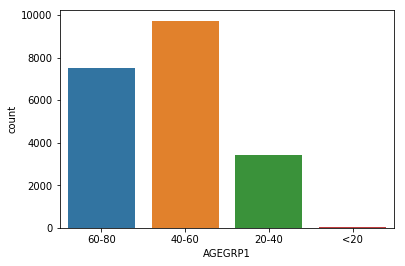

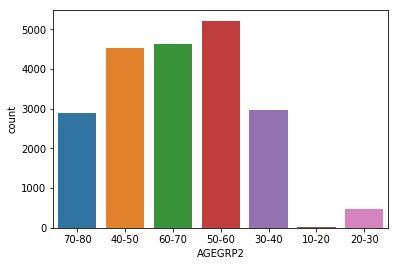

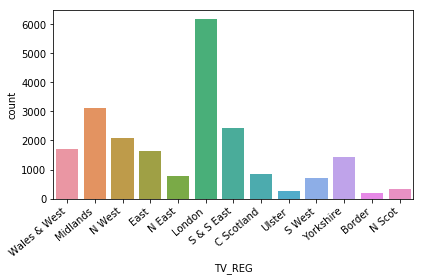

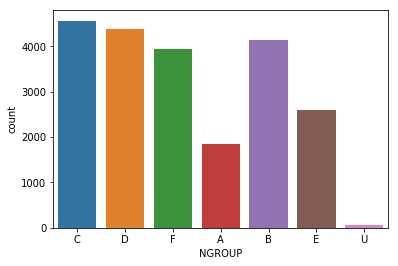

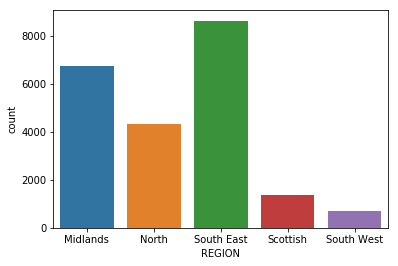

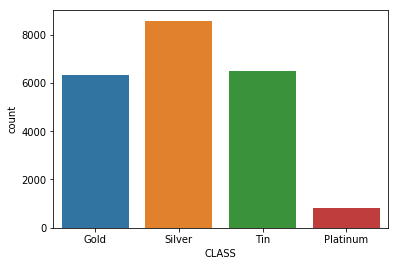

In [114]:
def print_countplot_graph():
    categorical = df2[['AGEGRP1', 'AGEGRP2', 'TV_REG', 'NGROUP', 'REGION', 'CLASS']]
    
    for i in categorical:
        if i == 'TV_REG':
            ax = sns.countplot(data=df2, x=i)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
            plt.tight_layout()
            plt.show()
            continue
        
        sns.countplot(data=df2, x=i)
        plt.show()
        
print_countplot_graph()

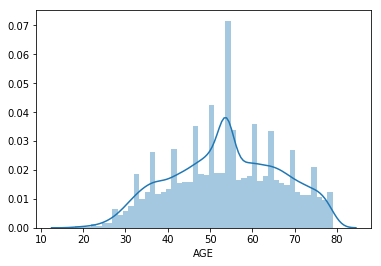

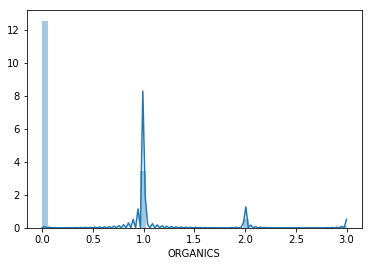

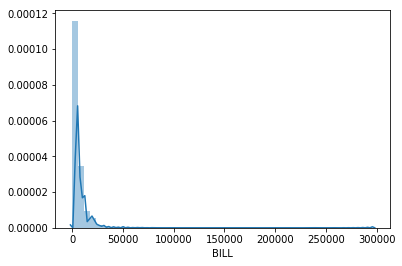

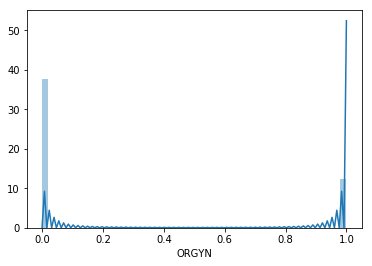

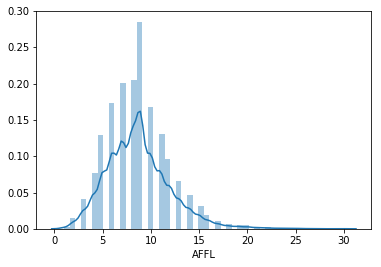

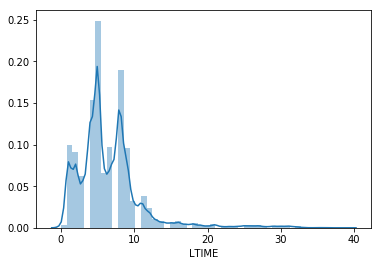

In [118]:
def print_distplot_graph():
    numerical = df2[['AGE', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']]
    
    for i in numerical:
        sns.distplot(df2[i])
        plt.show()
        
print_distplot_graph()

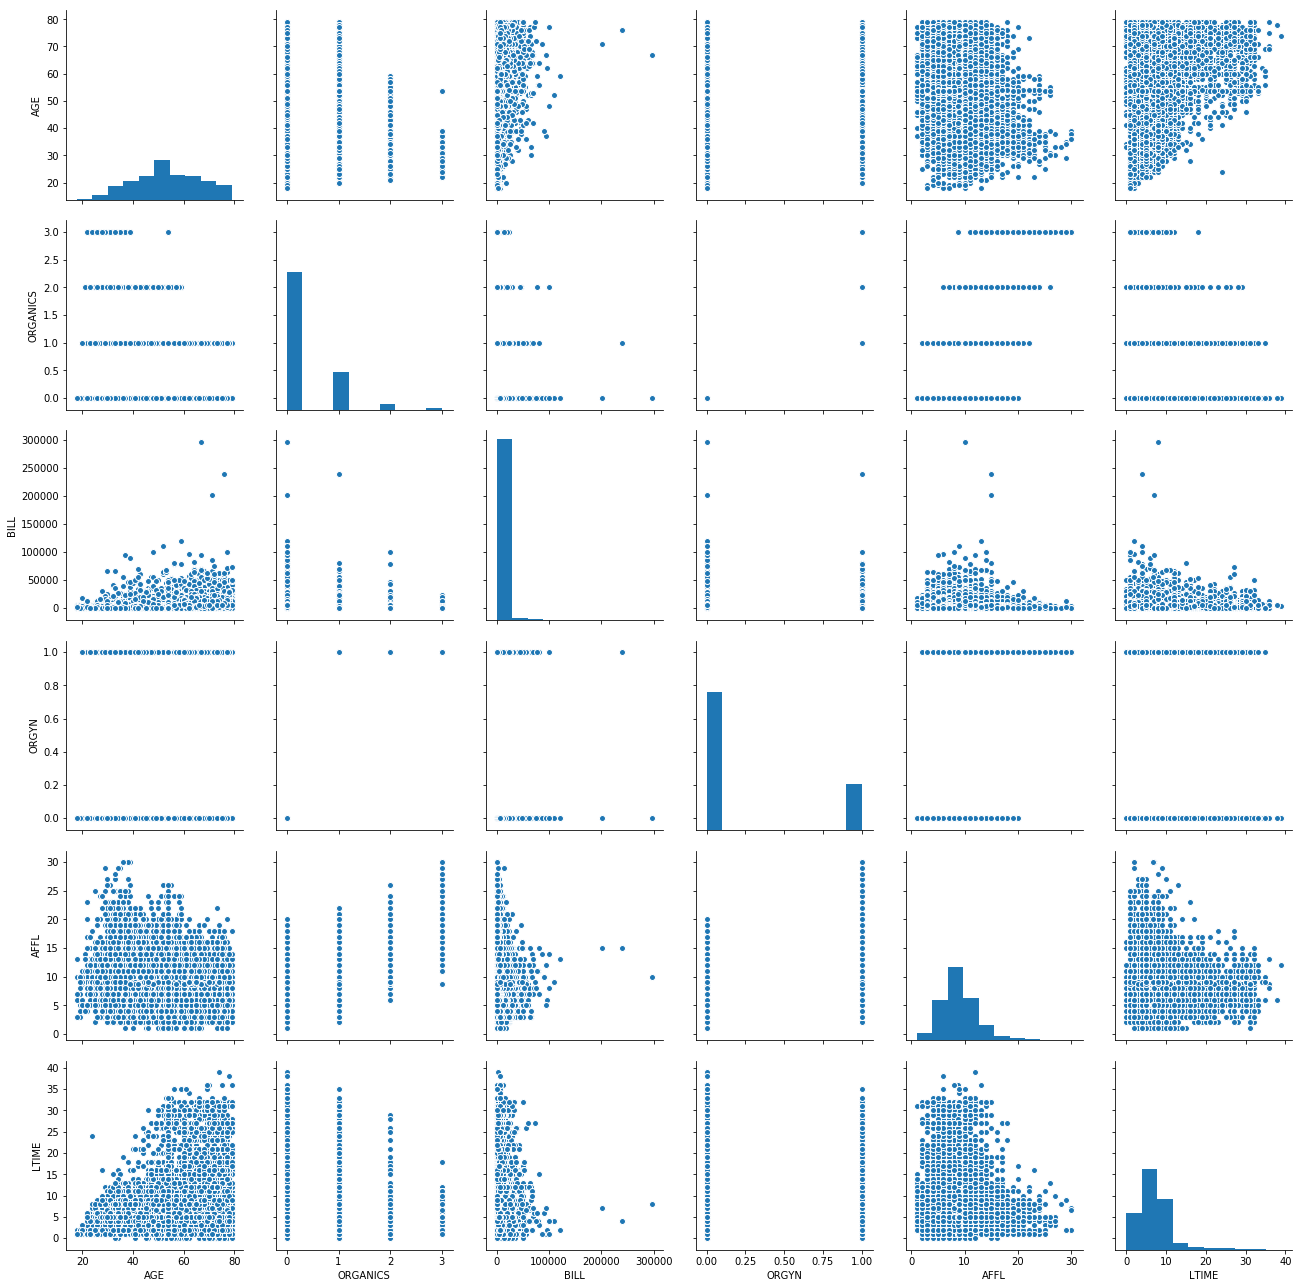

In [119]:
#All the combination chart
sns.pairplot(temp[['AGE', 'ORGANICS', 'BILL', 'ORGYN', 'AFFL', 'LTIME']], size=3)
plt.show()

In [121]:
#proportion of individuals purchased organic products
# get the value count of each gender
print("Raw count of how many genders bought organic products")
print(df.groupby(['ORGANICS'])['GENDER'].value_counts())

Raw count of how many genders bought organic products
ORGANICS  GENDER
0         F         7944
          M         4849
          U         1642
1         F         3539
          M          821
          U           91
2         F          538
          M          118
          U           12
3         F          128
          M           27
          U            2
Name: GENDER, dtype: int64


<h2>Answers to Task 1. Data Selection and Distribution</h2>
1. Can you identify any clear patterns by initial exploration of the data using histogram or box plot?

2. What is the proportion of individuals who purchased organic products?
3. Did you have to fix any data quality problems? Detail them.
4. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.
5. What distribution scheme did you use? What data partitioning allocation did you set? Explain your selection.